In [1]:
import pandas as pd
import numpy as np
xl = pd.ExcelFile("SELF-19712 - Monthly pull by trim.xlsx")
df = xl.parse("Sheet1")
Dates = ["2020-05-01", "2020-06-01", "2020-07-01", "2020-08-01", "2020-09-01", "2020-10-01", "2020-11-01",
        "2020-12-01", "2021-01-01", "2021-02-01", "2021-03-01", "2021-04-01"]



In [13]:
TaycanCheck = df.loc[(df['ReportDate'] == "2020-05-01") & (df['ModelYear'] == 2020) & (df["DivisionName"] == "Porsche") & (df["ModelName"] == "Taycan")]
TaycanCheck.head()


,ReportDate,ModelYear,DivisionName,ModelName,Trim,StockType,vehicleCount,totalPrice,avgPriceCount,avgPrice
66658,2020-05-01,2020,Porsche,Taycan,Turbo,used,11,1448388,8,181048.500000
66659,2020-05-01,2020,Porsche,Taycan,Turbo S,used,5,612343,3,204114.333333
72742,2020-05-01,2020,Porsche,Taycan,4S,new,117,14990079,111,135045.756757
72743,2020-05-01,2020,Porsche,Taycan,Turbo,new,240,39745749,227,175091.405286
72744,2020-05-01,2020,Porsche,Taycan,Turbo S,new,68,12725720,63,201995.555556


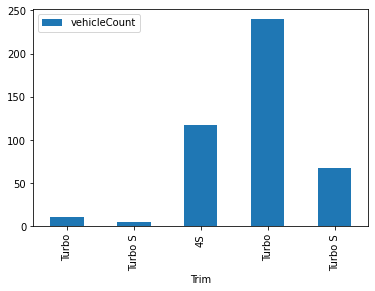

In [8]:
Taycan2020TrimCheck = df.loc[(df['ReportDate'] == "2020-05-01") & (df['ModelYear'] == 2020) & (df["DivisionName"] == "Porsche") & (df["ModelName"] == "Taycan")]
Taycan2020TrimCheck.plot.bar(x='Trim', y='vehicleCount')

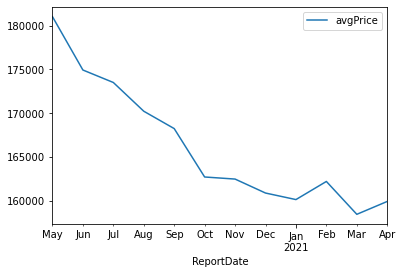

In [10]:
Taycan2020 = df.loc[(df['ReportDate'].isin(Dates)) & (df['ModelYear'] == 2020) & (df["DivisionName"] == "Porsche") & (df["ModelName"] == "Taycan") & (df["Trim"] == "Turbo") & (df['StockType'] == "used")]
Taycan2020.plot.line(x='ReportDate', y='avgPrice')

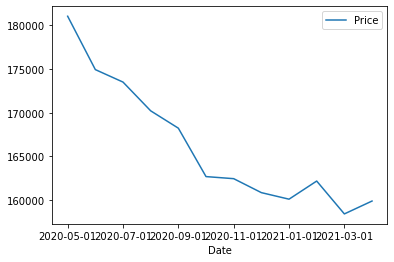

In [11]:
import numpy as np
l = []
for D in Dates:
    num2020 = Taycan2020.loc[(df['ReportDate'] == D)]['avgPrice'].iloc[0]
    l += [np.average([num2020])]

data = {'Date': Dates,
        'Price': l}
Taycan = pd.DataFrame(data)  

Taycan.plot.line(x='Date', y='Price')

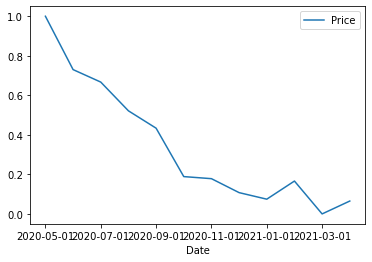

In [15]:
maximum = max(l)
minimum = min(l)
standard = []
for val in l:
    standardized = (val - minimum) / (maximum - minimum)
    standard += [standardized]
data = {'Date': Dates,
        'Price': standard}
Taycan = pd.DataFrame(data)  

Taycan.plot.line(x='Date', y='Price')  